In [ ]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from database.connexion import get_connection

1. Connexion à la base

In [23]:
# === 1. Connexion à la base de données ===
sys.path.append(os.path.abspath(".."))

try:
    conn = get_connection()

    # 🔧 Forcer la conversion en str pour SQLAlchemy
    user = conn.user.decode() if isinstance(conn.user, bytes) else conn.user
    password = conn.password.decode() if isinstance(conn.password, bytes) else conn.password
    host = conn.host.decode() if isinstance(conn.host, bytes) else conn.host
    db = conn.db.decode() if isinstance(conn.db, bytes) else conn.db
    port = conn.port

    engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{db}")
    print("✅ Connexion réussie à la base de données MySQL via SQLAlchemy !")

except Exception as e:
    print(f"❌ Erreur de connexion à la base de données : {e}")
    raise SystemExit

✅ Connexion réussie à la base de données MySQL !
✅ Connexion réussie à la base de données MySQL via SQLAlchemy !


2. Chargement des données

In [25]:
# === 2. Chargement des données ===
try:
    results_df = pd.read_sql("SELECT * FROM results", engine)
    print(f"✅ Données résultats chargées ({len(results_df)} lignes)")
except Exception as e:
    print(f"❌ Erreur lors du chargement des données : {e}")
    raise SystemExit

✅ Données résultats chargées (142000 lignes)



🔍 Aperçu des données :
   id discipline_title    event_title     slug_game participant_type  \
0   1          Curling  Mixed Doubles  beijing-2022         GameTeam   
1   2          Curling  Mixed Doubles  beijing-2022         GameTeam   
2   3          Curling  Mixed Doubles  beijing-2022         GameTeam   
3   4          Curling  Mixed Doubles  beijing-2022         GameTeam   
4   5          Curling  Mixed Doubles  beijing-2022         GameTeam   

  medal_type athletes  rank_equal  rank_position   country_name country_code  \
0       GOLD       []         0.0            1.0          Italy           IT   
1     SILVER       []         0.0            2.0         Norway           NO   
2     BRONZE       []         0.0            3.0         Sweden           SE   
3       None       []         0.0            4.0  Great Britain           GB   
4       None       []         0.0            5.0         Canada           CA   

  country_3_letter_code athlete_url athlete_full_name value_un

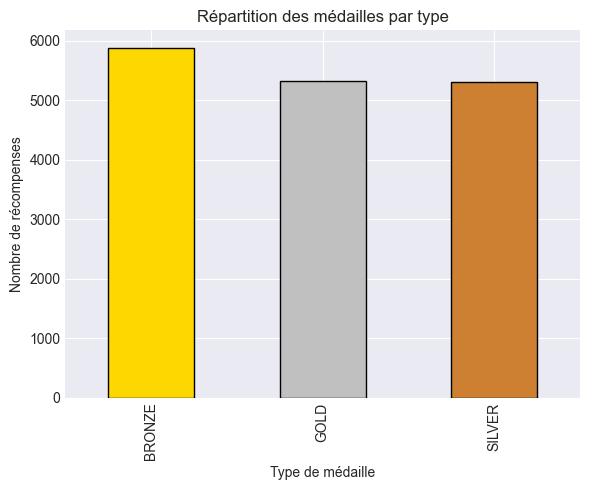


🌍 Top 10 pays les plus médaillés :
country_name
United States of America      1782
People's Republic of China    1160
Germany                       1041
Russian Federation             972
Great Britain                  677
France                         656
Australia                      594
Italy                          574
Canada                         572
Japan                          566
Name: count, dtype: int64


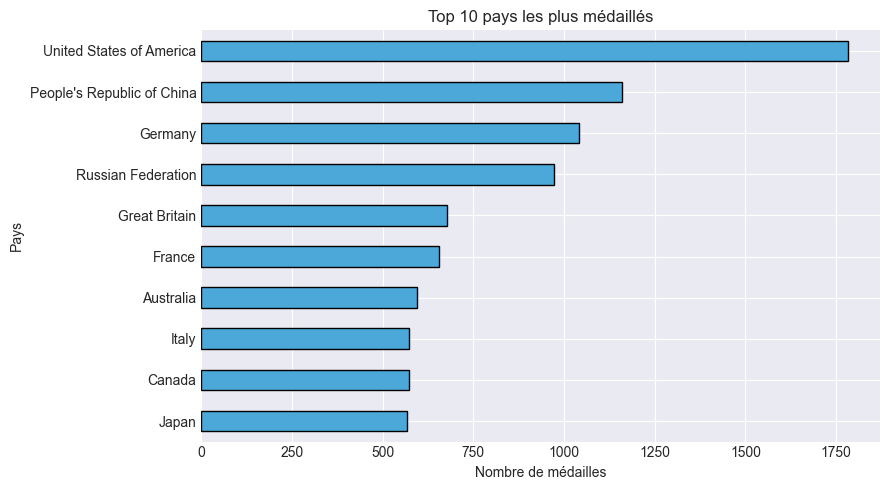


🏋️‍♀️ Disciplines les plus représentées :
discipline_title
Swimming                13199
Athletics               13071
Cross Country Skiing     9206
Alpine Skiing            8778
Biathlon                 7354
Shooting                 7336
Wrestling                4728
Judo                     4600
Speed skating            4539
Sailing                  3800
Name: count, dtype: int64


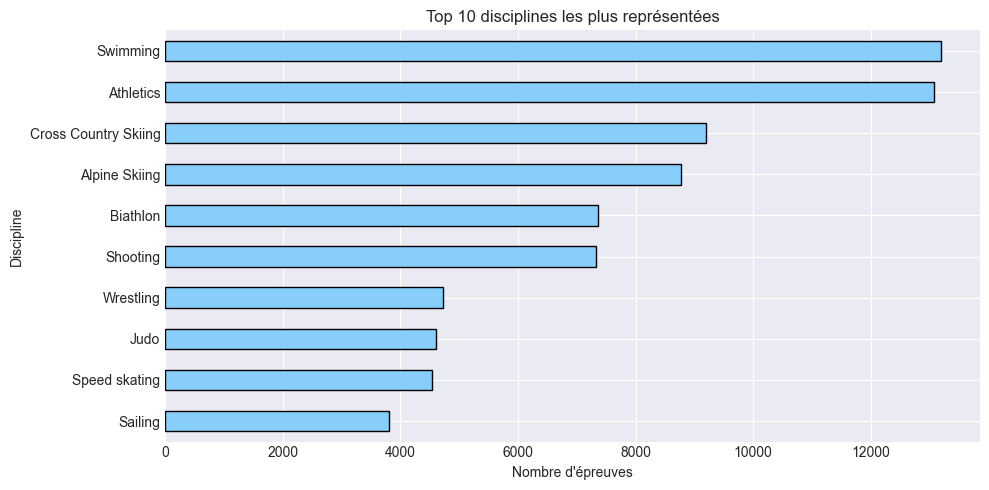


👥 Type de participants :
participant_type
Athlete     122341
GameTeam     19659
Name: count, dtype: int64


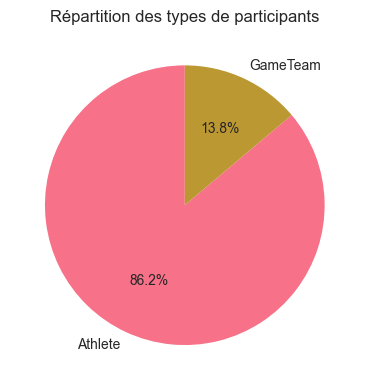


📆 Éditions avec le plus de médailles distribuées :
slug_game
tokyo-2020             2152
rio-2016               1946
london-2012            1910
beijing-2008           1908
athens-2004            1852
sydney-2000            1640
atlanta-1996            842
beijing-2022            654
pyeongchang-2018        614
sochi-2014              586
barcelona-1992          522
vancouver-2010          516
turin-2006              504
salt-lake-city-2002     468
nagano-1998             205
Name: medal_type, dtype: int64


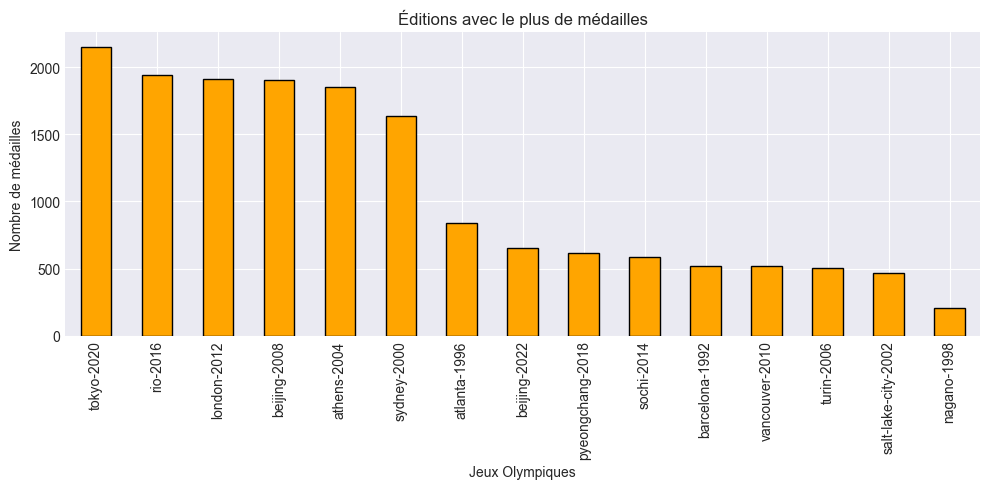


✅ Analyse des résultats terminée avec succès !


In [27]:
# === 3. Exploration initiale ===
print("\n🔍 Aperçu des données :")
print(results_df.head())

print("\nℹ️ Informations générales :")
print(results_df.info())

# === 4. Nettoyage de base ===
results_df = results_df.drop_duplicates()
results_df = results_df.where(pd.notnull(results_df), None)

# === 5. Statistiques descriptives ===
print("\n📊 Statistiques globales :")
print(results_df.describe(include="all"))

# === 6. Analyse des médailles ===
if "medal_type" in results_df.columns:
    print("\n🏅 Répartition des médailles :")
    print(results_df["medal_type"].value_counts())

    plt.figure(figsize=(6, 5))
    results_df["medal_type"].value_counts().plot(
        kind="bar", color=["#FFD700", "#C0C0C0", "#CD7F32"], edgecolor="black"
    )
    plt.title("Répartition des médailles par type")
    plt.xlabel("Type de médaille")
    plt.ylabel("Nombre de récompenses")
    plt.tight_layout()
    plt.show()

# === 7. Top 10 pays par médailles ===
if "country_name" in results_df.columns and "medal_type" in results_df.columns:
    medals_by_country = results_df[results_df["medal_type"].notnull()]
    top_countries = medals_by_country["country_name"].value_counts().head(10)

    print("\n🌍 Top 10 pays les plus médaillés :")
    print(top_countries)

    plt.figure(figsize=(9, 5))
    top_countries.sort_values().plot(kind="barh", color="#4DA8DA", edgecolor="black")
    plt.title("Top 10 pays les plus médaillés")
    plt.xlabel("Nombre de médailles")
    plt.ylabel("Pays")
    plt.tight_layout()
    plt.show()

# === 8. Répartition par discipline ===
if "discipline_title" in results_df.columns:
    top_disciplines = results_df["discipline_title"].value_counts().head(10)

    print("\n🏋️‍♀️ Disciplines les plus représentées :")
    print(top_disciplines)

    plt.figure(figsize=(10, 5))
    top_disciplines.sort_values().plot(kind="barh", color="#87CEFA", edgecolor="black")
    plt.title("Top 10 disciplines les plus représentées")
    plt.xlabel("Nombre d'épreuves")
    plt.ylabel("Discipline")
    plt.tight_layout()
    plt.show()

# === 9. Analyse des participants ===
if "participant_type" in results_df.columns:
    print("\n👥 Type de participants :")
    print(results_df["participant_type"].value_counts())

    plt.figure(figsize=(6, 4))
    results_df["participant_type"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90)
    plt.title("Répartition des types de participants")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

# === 10. Médaille par édition (slug_game) ===
if "slug_game" in results_df.columns and "medal_type" in results_df.columns:
    medals_by_game = results_df.groupby("slug_game")["medal_type"].count().sort_values(ascending=False).head(15)

    print("\n📆 Éditions avec le plus de médailles distribuées :")
    print(medals_by_game)

    plt.figure(figsize=(10, 5))
    medals_by_game.plot(kind="bar", color="#FFA500", edgecolor="black")
    plt.title("Éditions avec le plus de médailles")
    plt.xlabel("Jeux Olympiques")
    plt.ylabel("Nombre de médailles")
    plt.tight_layout()
    plt.show()

print("\n✅ Analyse des résultats terminée avec succès !")


1. Connexion à la base de données